# Lagrange expansion
Jakub Seredyński 54589

# Task:
## Implement the function from the image below:

<img src="Equation.png">

# Solution

In the equation we have two main functions:
1. **Repeated Sum** represented by Big Sigma
2. **Repeated Multiplication** represented by Big Pi

Let's implement them in code and write the main function using them.

# Repeated sum

In [8]:
from typing import Callable


def repeated_sum_first(count: int, function: Callable[[int], float]):
    result = 0
    for i in range(0, count):
        result = result + function(i)
    return result

This function takes a count (the number above the sigma assuming we start from zero) and a method to sum.

Let's check the sum of numbers from 0 to 10 which we know should equal to 55

In [9]:
repeated_result = repeated_sum_first(11, lambda x: x)
expected_result = 55

expected_result == repeated_result

True

# Repeated multiplication

In [10]:
def repeated_multiplication_first(count: int, function: Callable[[int], float]):
    result = 1
    for i in range(0, count):
        result = result * function(i)
    return result

# Joining methods
As we can see the methods are very similar, we can extract the main part. Additionally, the repeated multiplication in the formula in the picture has a skipping condition for `i == j`, let's also include it.

In [11]:
from typing import  List

def iterative_math(count: int, skip_conditions: List[Callable[[int], bool]],
                   function_to_execute: Callable[[int], float],
                   initial_value: float, iterative_function: Callable[[float, float], float]):
    result = initial_value
    for i in range(0, count):
        if any(condition(i) for condition in skip_conditions):
            continue
        result = iterative_function(result, function_to_execute(i))
    return result


def sum(count: int, skip_conditions: List[Callable[[int], bool]], function_to_sum: Callable[[int], float]):
    return iterative_math(count, skip_conditions, function_to_sum, 0, lambda r, s: r + s)


def multiply(count: int, skip_conditions: List[Callable[[int], bool]], function_to_multiply: Callable[[int], float]):
    return iterative_math(count, skip_conditions, function_to_multiply, 1, lambda r, s: r * s)


# Points
With the formula ready, we're only missing the structure to hold points. Luckily it's not that hard to implement

In [12]:
class Point:
    def __init__(self, x: float, y: float):
        self.X = x
        self.Y = y


# Final formula

In [13]:
def solve(x: float, points: List[Point]):
    return sum(count=len(points),
               skip_conditions=[],
               function_to_sum=
                   lambda i: points[i].Y * multiply(
                       count=len(points),
                       skip_conditions=[lambda j: j == i],
                       function_to_multiply=
                           lambda j: (x - points[j].X) / (points[i].X - points[j].X)
               ))

It looks a bit conveluted but it literal translation of the mathemathical formula to the code.

# Results

Point collection 1: (0, 4), (1, 2), (2.5, 2.75)
Point collection 2: (−2, 9),(−1, 4),(1, 0),(3, 4),(4, 9),(5, 16),(7, 20),(11, 5)

Let's put them into code

## Function 1

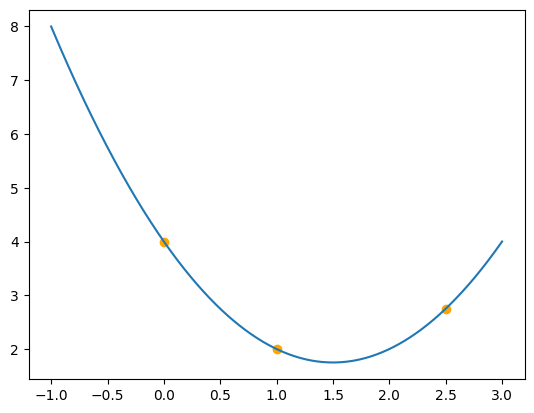

In [14]:
import matplotlib.pyplot as plot
import numpy

function1: List[Point] = [Point(0, 4), Point(1, 2), Point(2.5, 2.75)]

plot.scatter(list(point.X for point in function1), list(point.Y for point in function1), c="orange")

function1_draw_X = []
function1_draw_y = []
for x in numpy.linspace(-1, 3, 1000):
    function1_draw_X.append(x)
    function1_draw_y.append(solve(x, points=function1))

plot.plot(function1_draw_X, function1_draw_y)

## Function 2

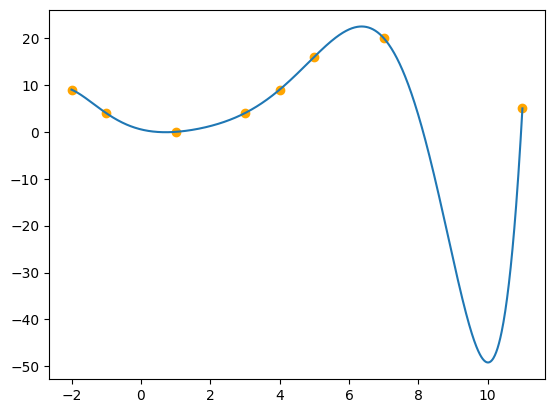

In [15]:
function2: List[Point] = [Point(-2, 9), Point(-1, 4), Point(1, 0), Point(3, 4), Point(4, 9), Point(5, 16), Point(7, 20), Point(11, 5)]

plot.scatter(list(point.X for point in function2), list(point.Y for point in function2), c="orange")

function2_draw_X = []
function2_draw_y = []
for x in numpy.linspace(-2, 11, 1000):
    function2_draw_X.append(x)
    function2_draw_y.append(solve(x, points=function2))

plot.plot(function2_draw_X, function2_draw_y)